<a href="https://colab.research.google.com/github/sfmoram/PDI-SM/blob/main/Laboratorio_Segmentaci%C3%B3nColor_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='darkred'> **Sexto Laboratorio: Segmentación a color con el algoritmo k-means**

[Referencia](https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python)

# <font color='darkred'> Cargar Imágenes

In [1]:
!wget https://www.dropbox.com/scl/fi/vq21gzhifq4bw58row8nl/river.png?rlkey=sa6yznxn4oxh17p40dvpn9gpp&dl=0
!wget https://www.dropbox.com/scl/fi/zkwlwtnmeh47pkhkk4a99/flowers.jpeg?rlkey=nj1cbdp0zozxe1x039gt803w5&dl=0

--2023-08-11 21:35:13--  https://www.dropbox.com/scl/fi/vq21gzhifq4bw58row8nl/river.png?rlkey=sa6yznxn4oxh17p40dvpn9gpp
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/vq21gzhifq4bw58row8nl/river.png?rlkey=sa6yznxn4oxh17p40dvpn9gpp [following]
--2023-08-11 21:35:13--  https://www.dropbox.com/e/scl/fi/vq21gzhifq4bw58row8nl/river.png?rlkey=sa6yznxn4oxh17p40dvpn9gpp
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdc70a16ce633436fc19c3b07f7.dl.dropboxusercontent.com/cd/0/get/CBmNkodBe5ufCoZ3kIJ5AfHakQ2JGJTIjeozQyUel0hfcyu8NMA5e_MuJNAodlnViKvuj-SILR8t1Y6BWaASMhChhuJT1HNT156V0qngkU6Gfbm-8A1QWrb2zZLgovKfwbudRVEcYS-6Pzot2YwQz7kk/file# [following]
--2023-08-11 21:35:14--  https://ucdc70a16ce633436fc19c3b07f7.dl.d

# <font color='darkred'> Importar Líbrerias

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

# <font color='darkred'> Segmentación k-means

<font color='darkred'>Toma una imagen, aplica la segmentación k-means para agrupar los píxeles por similitud de color y muestra la imagen resultante con los colores reducidos a solo k colores. En este caso, k = 4, por lo que verás una versión de la imagen original pero con solo cuatro colores distintos.

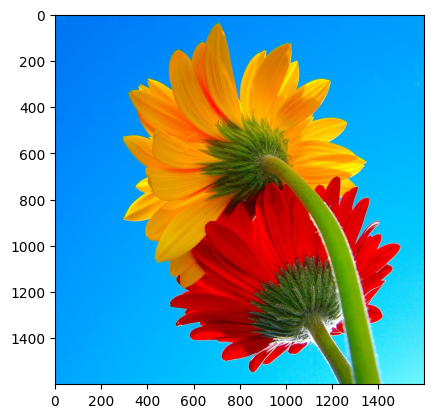

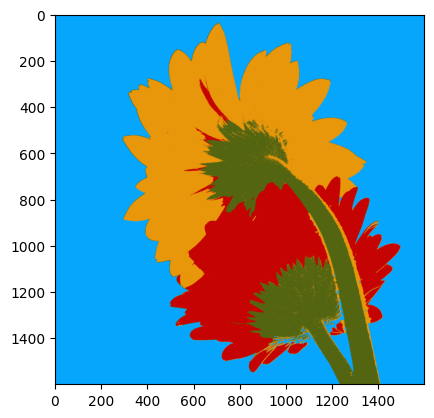

In [3]:
image = cv2.imread('flowers.jpeg?rlkey=nj1cbdp0zozxe1x039gt803w5')
#k = 3 # número de clusters (K)
k = 4 # número de clusters (K)

# La imagen se convierte de BGR (formato predeterminado de OpenCV) a RGB para su visualización con Matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# La imagen (que es una matriz 3D) se redimensiona en una matriz 2D donde cada fila representa un píxel y las columnas son los tres valores RGB de ese píxel:
pixel_values = image.reshape((-1, 3))
# Estos valores se convierten en float32 porque el método k-means de OpenCV requiere que los datos estén en este formato.
pixel_values = np.float32(pixel_values)

# Se define un criterio de parada para el algoritmo k-means:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Se ejecuta el algoritmo k-means utilizando los valores de píxeles como datos
compactness, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Se convierten los centroides del clúster a valores de 8 bits
centers = np.uint8(centers)

# Se aplana el arreglo de etiquetas para poder usarlo para indexar los centros
labels = labels.flatten()

# Para cada píxel en la imagen, se asigna el color de su clúster correspondiente
segmented_image = centers[labels]

# Vuelve a cambiar la forma de la imagen segmentada a la forma original
segmented_image = segmented_image.reshape(image.shape)

# Muestra la imagen
plt.imshow(segmented_image)
plt.show()



# <font color='darkred'> Enmascaramiento del clúster

 <font color='darkred'>Este código tiene como objetivo "deshabilitar" un clúster específico de la imagen segmentada resultante del algoritmo k-means. Específicamente, está configurado para deshabilitar el clúster número 0, lo que significa que todos los píxeles pertenecientes a ese clúster se cambiarán a negro.

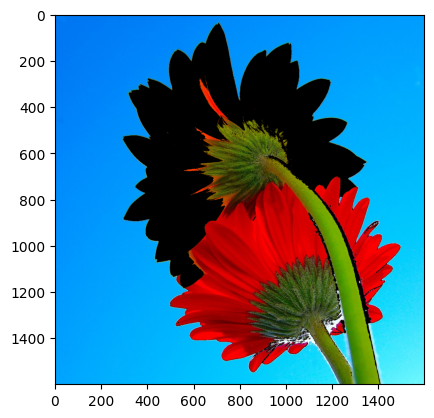

In [7]:
# Se crea una copia de la imagen original para evitar modificar la imagen original cuando se cambian los píxeles a negro.
masked_image = np.copy(image)

# La imagen (que es una matriz 3D) se redimensiona en una matriz 2D, similar a lo que se hizo anteriormente, donde cada fila representa un píxel y las columnas son los tres valores RGB de ese píxel.
masked_image = masked_image.reshape((-1, 3))

# Define el clúster que se quiere deshabilitar. En este caso, es el clúster número 0.
cluster = 2 # Cambia este numero y mira los resultados

# Se utiliza un índice booleano para identificar todos los píxeles en masked_image que pertenecen al clúster 0
#(basado en las etiquetas de clústeres generadas anteriormente por k-means).
# Una vez identificados esos píxeles, se establecen sus valores RGB a [0, 0, 0], que es negro.
masked_image[labels == cluster] = [0, 0, 0]

# La imagen se redimensiona nuevamente a su forma original (3D).
masked_image = masked_image.reshape(image.shape)

# Muestra la imagen
plt.imshow(masked_image)
plt.show()